In [202]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import scipy

In [203]:
filename = '../SampleWavFiles/piano_mix.wav'
# filename = '../SampleWavFiles/StarWars3.wav'
audio, sr = librosa.load(filename)
num_sources = 3

print('Audio Shape:', audio.shape)
print('Sample Rate:', sr)

Audio Shape: (77014,)
Sample Rate: 22050


In [204]:
ipd.Audio(audio, rate=sr)

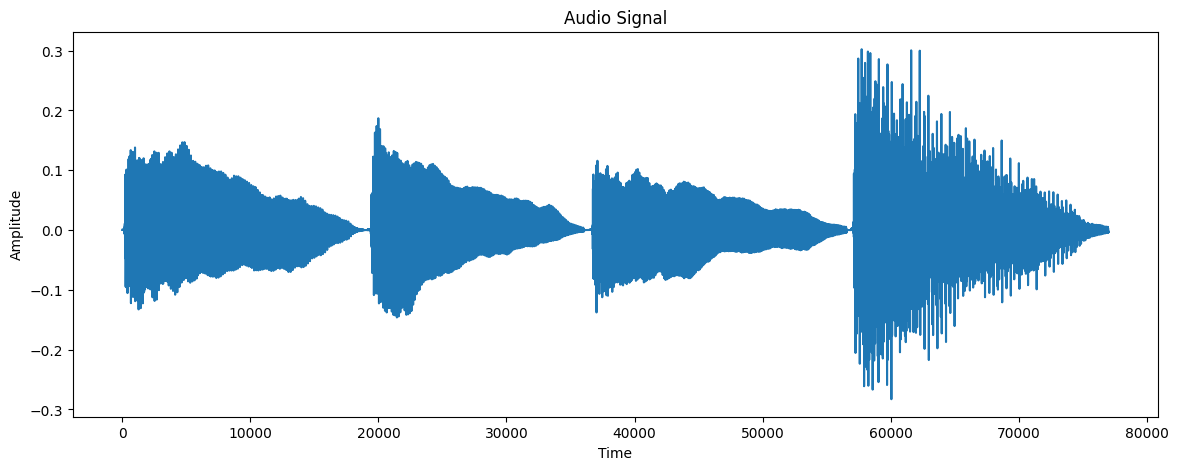

In [205]:
# Plot the audio signal
plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.title('Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

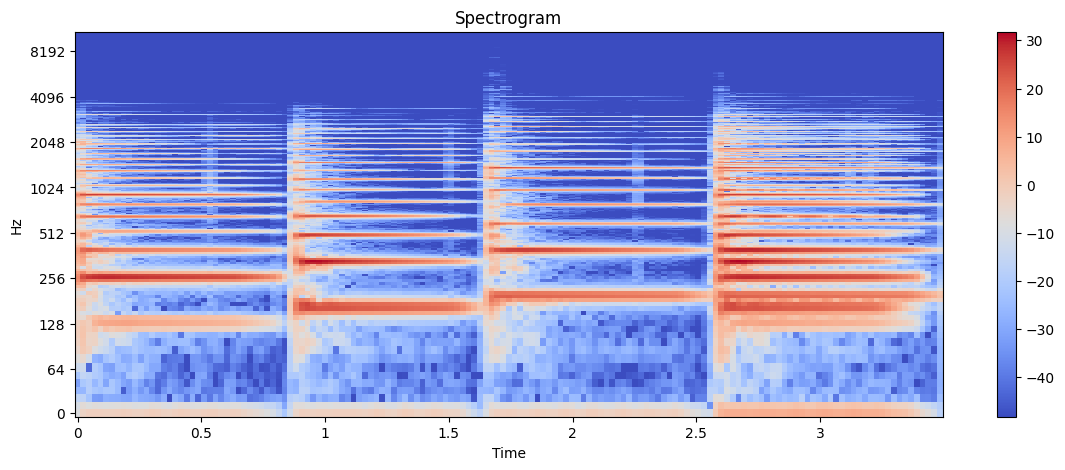

In [206]:
# Plot the spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

In [207]:
# Get magnitude and phase of the signal
mag, phase = librosa.magphase(X)

# Perform NMF
n_components = num_sources
W, H = librosa.decompose.decompose(mag, n_components=n_components, sort=True)

print('W Shape:', W.shape)
print('H Shape:', H.shape)

W Shape: (1025, 3)
H Shape: (3, 151)


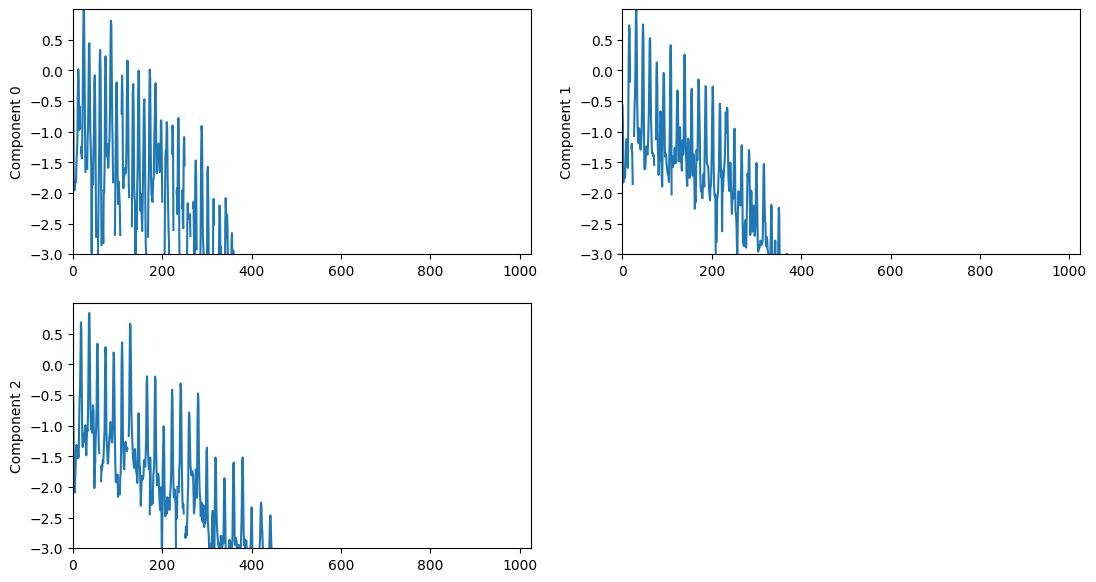

In [208]:
plt.figure(figsize=(13, 7))
logW = np.log10(W)
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components/2)), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

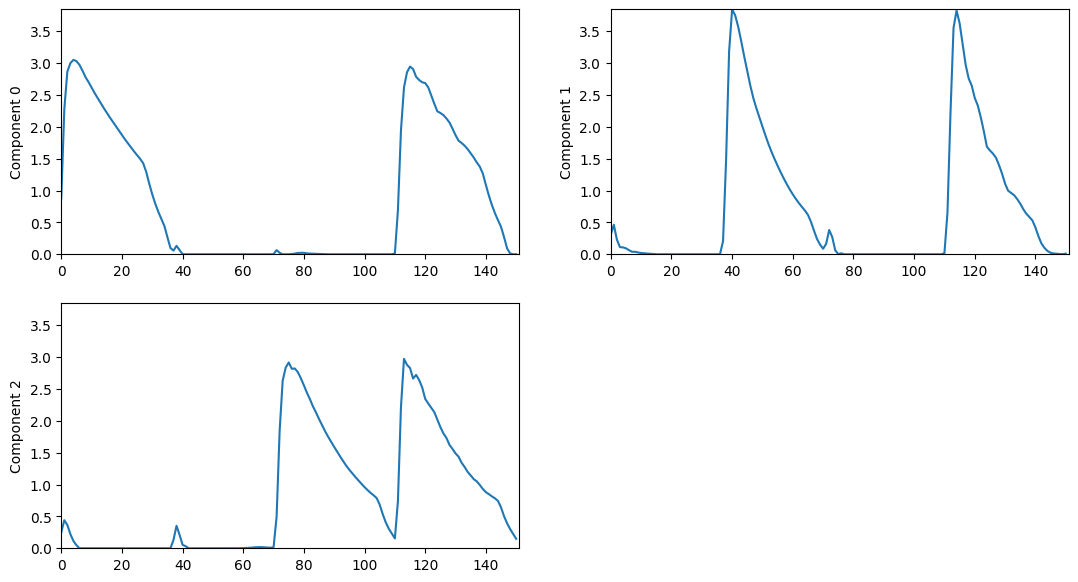

In [209]:
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components/2)), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [210]:
reconstructed_components = []
for n in range(n_components):
    
    # Re-create the STFT of a single NMF component.
    Y = scipy.outer(W[:,n], H[n]) * phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)

    reconstructed_components.append(y)

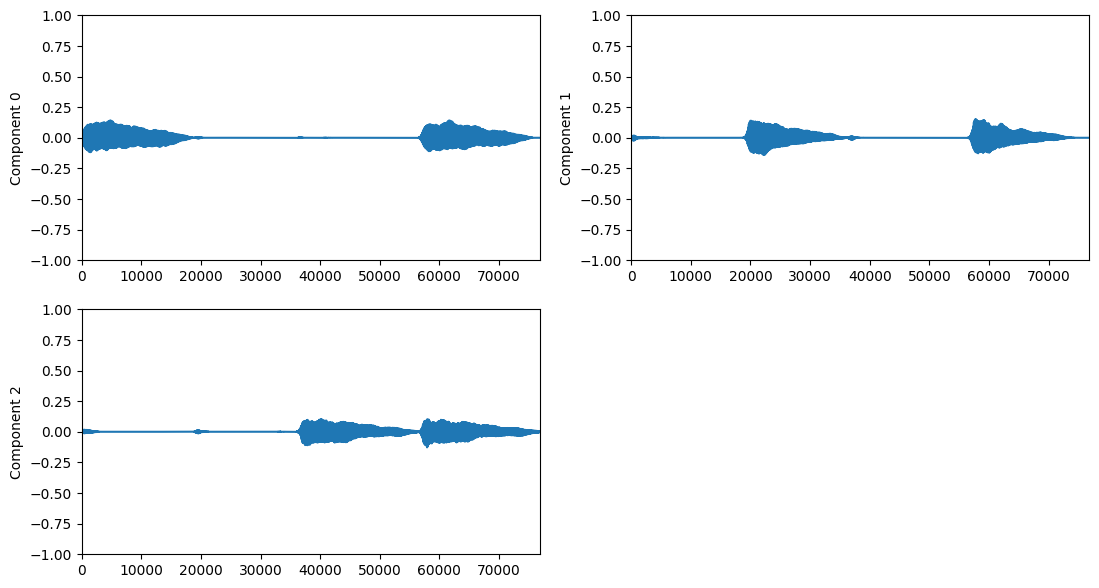

In [211]:
# display all the components
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components / 2)), 2, n+1)
    plt.plot(reconstructed_components[n])
    plt.ylim(-1, 1)
    plt.xlim(0, reconstructed_components[n].shape[0])
    plt.ylabel('Component %d' % n)

plt.show()

In [212]:
# play each reconstructed component
for i in range(n_components):
    ipd.display(ipd.Audio(reconstructed_components[i], rate=sr))

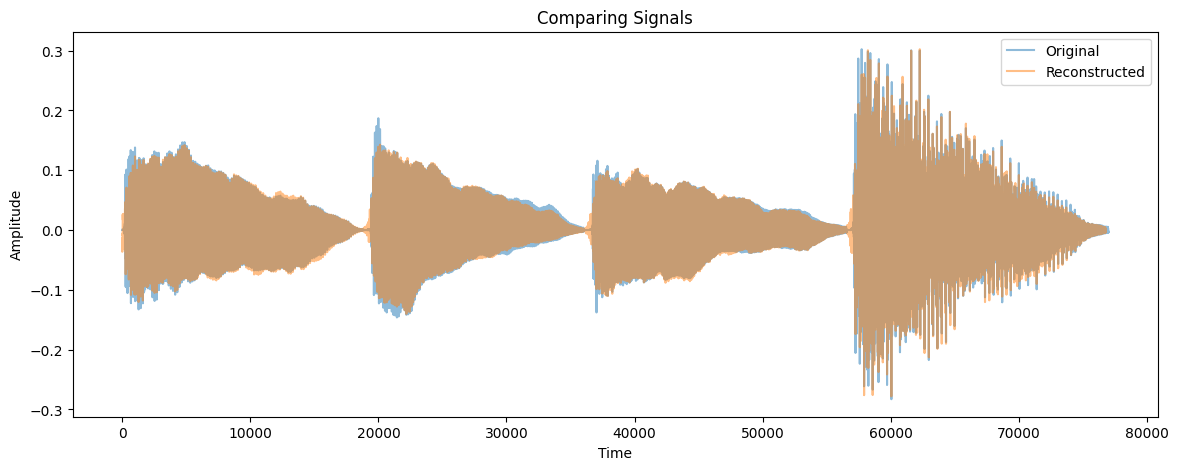

In [213]:
# Combine the components into a single signal.
reconstructed_signal = np.sum(reconstructed_components, axis=0)

# plot the reconstructed signal and the original signal
plt.figure(figsize=(14, 5))
plt.plot(audio, label='Original', alpha=0.5)
plt.plot(reconstructed_signal, label='Reconstructed', alpha=0.5)
plt.title('Comparing Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [214]:
# play the original signal
print('Original Signal')
ipd.display(ipd.Audio(audio, rate=sr))

# play the reconstructed signal
print('Reconstructed Signal')
ipd.display(ipd.Audio(reconstructed_signal, rate=sr))

Original Signal


Reconstructed Signal
